# Praca domowa 7

***Renata Rólkiewicz***

### Wstęp

In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import numpy as np 
from sklearn.decomposition import PCA

Do tej pracy domowej użyjemy dwóch obrazów:
- logo Wydziału MiNI
- zdjęcie z jasełek podczas Wigilii MiNI 2019

Sprawdzimy jak PCA radzi sobie z kompresją powyższych obrazków porównując działanie dla różnej liczby komponentów.

In [2]:
img1 = mpimg.imread('mini.png') # logo Wydziału MiNI
img2 = mpimg.imread('wigilia.png') # Zdjęcie z jasełek - Wigilia MiNI 2019

### Funkcja `img_compression`

 Zdefiniowana funkcja `img_compression`:
 - przyjmuje obraz (*img*) oraz liczbę komponentów PCA (*n*)
 - zwraca skompresowany obraz wraz z informacją o liczbie komponentów, wyjaśnionej wariancji i zmniejszeniu obrazka (zaokrągloną do dwóch miejsc po przecinku)

In [3]:
def img_compression(img, n):
    # img - obrazek, n - liczba komponentów PCA
    
    # zmiana rozmiaru do dwóch wymiarów
    img_reshaped = np.reshape(img, (img.shape[0],img.shape[1]*img.shape[2]))
    # PCA
    pca = PCA(n).fit(img_reshaped)
    img_pca = pca.transform(img_reshaped)
    img_final = pca.inverse_transform(img_pca)
    # ponowna zmiana rozmiaru
    img_final = np.reshape(img_final, (img.shape[0],img.shape[1],img.shape[2]))
 
    plt.axis('off')
    plt.title('Kompresja - '+ str(n) +' komponentów'
              + '\n Wariancja:' + str(np.sum(pca.explained_variance_ratio_))
              + '\n Obrazek ' + str(round(img.nbytes/img_pca.nbytes,2))  + ' razy mniejszy')
    fig = plt.imshow(img_final)
    return fig

### Przykładowe użycie funkcji `img_compression`

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


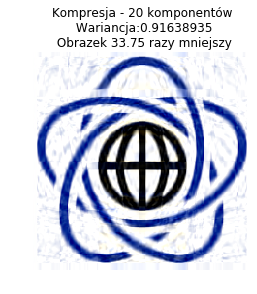

In [4]:
img_compression(img1,20)
plt.show()

Dla kompresji z 20 komponentami wariancja wyjaśniona jest na poziomie ~90%, a obrazek zminiejszył swoją objętość prawie 34 razy.

### Logo Wydziału MiNI

Porównamy oryginalny obraz z obrazami po kompresji przy użyciu funckcji `img_compression` dla 10,60,100 i 150 komponentów.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


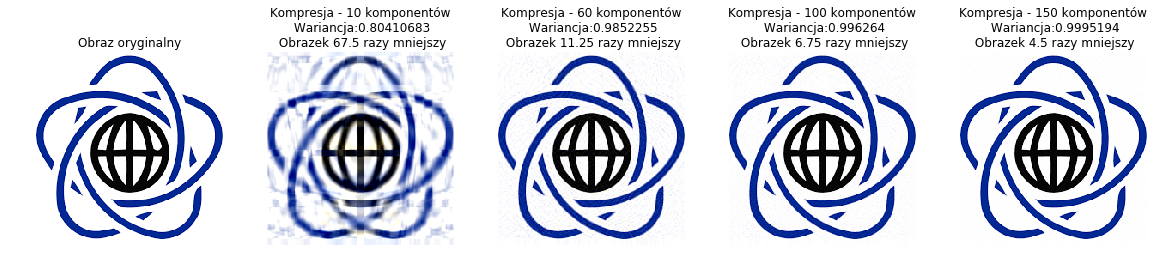

In [5]:
fig, axes=plt.subplots(1, 5,figsize=(20, 5))
plt.subplot(1,5,1)
plt.axis('off')
plt.title('Obraz oryginalny')
plt.imshow(img1)
plt.subplot(1,5,2)
img_compression(img1,10)
plt.subplot(1,5,3)
img_compression(img1,60)
plt.subplot(1,5,4)
img_compression(img1,100)
plt.subplot(1,5,5)
img_compression(img1,150)
plt.show()

Już dla 60 komponentów PCA wyjaśnia ponad 98% wariancji. Jakość obrazu nie odbiega znacząco od jakości oryginalnej wersji, jednak widoczne są lekkie "szumy". Dla 100 komponentów są już one znacznie mniejsze, wręcz niezauważalne. Wariancja jest na poziomie 99,6% a obraz zmniejszył się prawie 7 razy.
Podsumowując, kompresja dla 100 komponentów nie zmieni jakości oryginalnego obrazu (zmiana będzie niezauważalna gołym okiem), a zmniejszy jego objętość prawie 7 razy!

**Porównanie oryginalnego obrazka i wersji dla 100 komponentów:**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


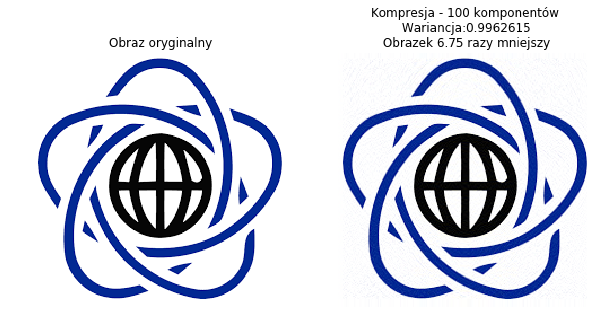

In [6]:
fig, axes=plt.subplots(1, 2,figsize=(10, 5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Obraz oryginalny')
plt.imshow(img1)
plt.subplot(1,2,2)
img_compression(img1,100)
plt.show()

### Jasełka - Wigilia MiNI 2019

Porównamy oryginalny obraz z obrazami po kompresji przy użyciu funckcji `img_compression` dla 10,50,100 i 150 komponentów.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


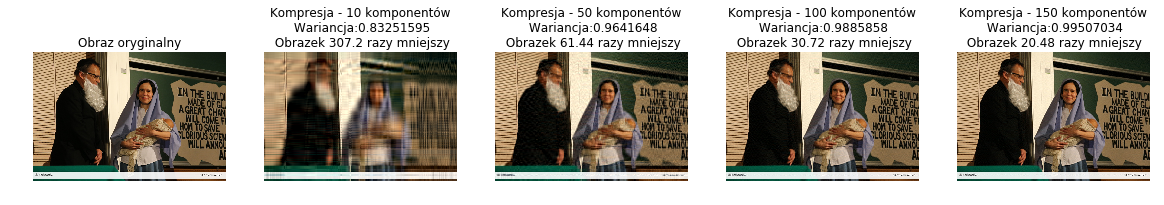

In [7]:
fig, axes=plt.subplots(1, 5,figsize=(20, 5))
plt.subplot(1,5,1)
plt.axis('off')
plt.title('Obraz oryginalny')
plt.imshow(img2)
plt.subplot(1,5,2)
img_compression(img2,10)
plt.subplot(1,5,3)
img_compression(img2,50)
plt.subplot(1,5,4)
img_compression(img2,100)
plt.subplot(1,5,5)
img_compression(img2,150)
plt.show()

Dla 100 komponentów otrzymujemy wariancję na poziomie 98,8%. Jednak po dokładniejszym przyjrzeniu i porównaniu z oryginalnym obrazem, widoczna jest utrata na jakości. Przy tak pięknym zdjęciu nie możemy pozwolić na taką stratę. Dla 150 komponentów jakość jest niemalże identyczna jak w oryginale, a zmiana w rozmiarze jest nadal bardzo duża (20 razy). 

**Porównanie oryginalnego obrazka i wersji dla 150 komponentów:**

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


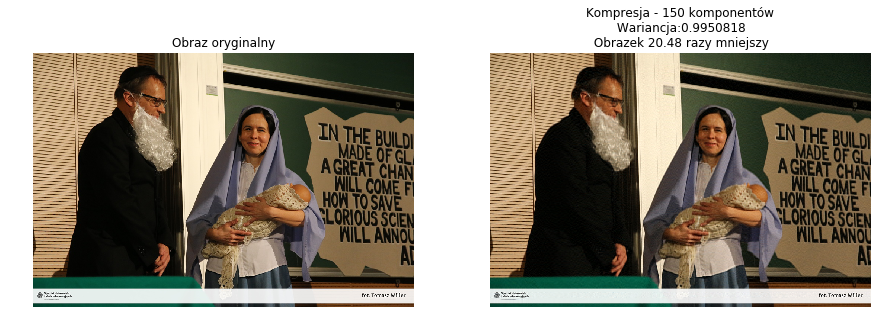

In [8]:
fig, axes=plt.subplots(1, 2,figsize=(15, 5))
plt.subplot(1,2,1)
plt.axis('off')
plt.title('Obraz oryginalny')
plt.imshow(img2)
plt.subplot(1,2,2)
img_compression(img2,150)
plt.show()

## Podsumowanie

PCA znakomicie sprawdziło się przy kompresji obrazów. Zarówno dla mniej skomplikowanego, mniejszego obrazka (logo) jak i bardziej skomplikowanego zdjęcia (jasełka) kompresja pozwoliła znacząco zmniejszyć rozmiar przy niezauważalnej utracie na jakości.

## Oświadczenie

Oświadczam, że niniejsza praca stanowiąca podstawę do uznania osiągnięcia efektów uczenia się z przedmiotu *Wstęp do uczenia maszynowego* została wykonana przeze mnie samodzielnie.

*Renata Rólkiewicz, 298840*